In [1]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install bs4
!pip install requests


In [2]:
 #Extracting Tesla Stock Data Using yfinance
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:

#Extracting Tesla Revenue Data Using Webscraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the correct table by looking for one with 'Tesla Quarterly Revenue' in it
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        for row in table.tbody.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    tesla_revenue = pd.concat(
                        [tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                        ignore_index=True
                    )
        break  # once we found and processed the right table, exit loop

tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue.head()
#Extracting Tesla Revenue Data Using Webscraping 


,Date,Revenue
0,2025-03-31,19335
1,2024-12-31,25707
2,2024-09-30,25182
3,2024-06-30,25500
4,2024-03-31,21301


In [5]:
#Extracting GameStop Stock Data Using yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [7]:
#Extracting GameStop Revenue Data Using Webscraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Search for the correct table by checking for 'GameStop Quarterly Revenue'
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        for row in table.tbody.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    gme_revenue = pd.concat(
                        [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                        ignore_index=True
                    )
        break  # stop after finding and processing the correct table

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue.head()


,Date,Revenue
0,2025-04-30,732
1,2025-01-31,1283
2,2024-10-31,860
3,2024-07-31,798
4,2024-04-30,882


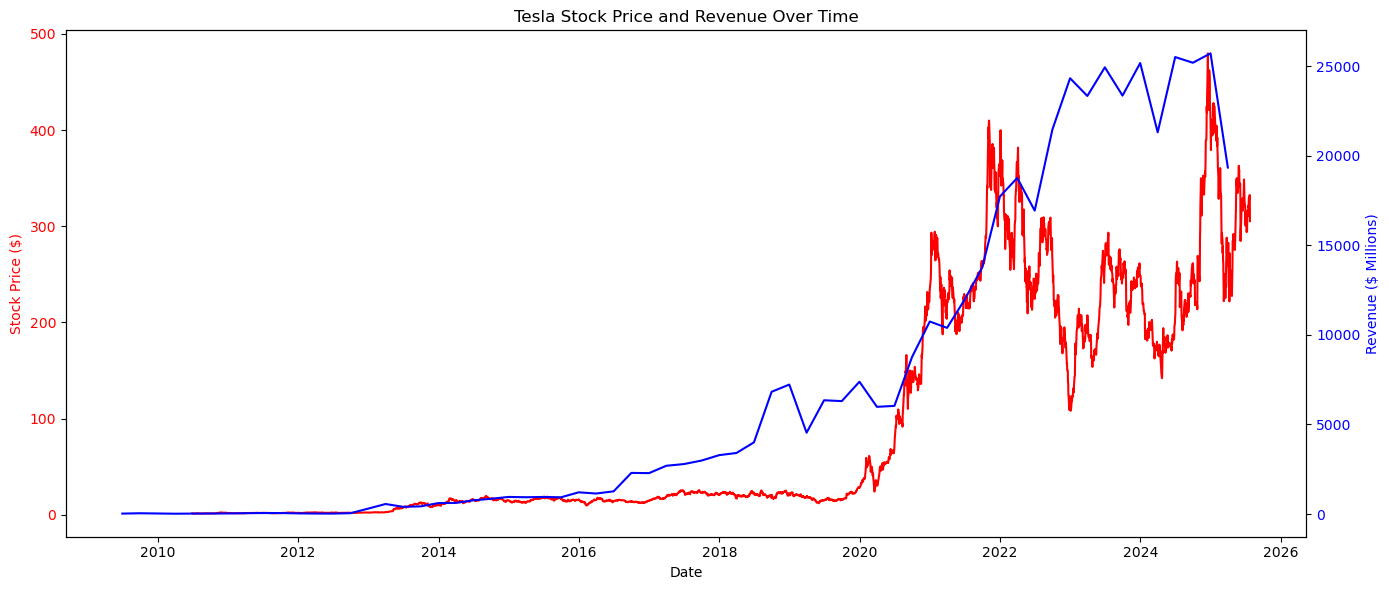

In [8]:
#Tesla Stock and Revenue Dashboard
import matplotlib.pyplot as plt

def make_dashboard(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color="red", label='Stock Price')
    ax1.set_ylabel("Stock Price ($)", color="red")
    ax1.set_xlabel("Date")
    ax1.tick_params(axis='y', labelcolor="red")
    ax1.set_title(f"{stock_name} Stock Price and Revenue Over Time")

    ax2 = ax1.twinx()
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    revenue_data.sort_values("Date", inplace=True)
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color="blue", label='Revenue')
    ax2.set_ylabel("Revenue ($ Millions)", color="blue")
    ax2.tick_params(axis='y', labelcolor="blue")

    fig.tight_layout()
    plt.show()

make_dashboard(tesla_data, tesla_revenue, 'Tesla')


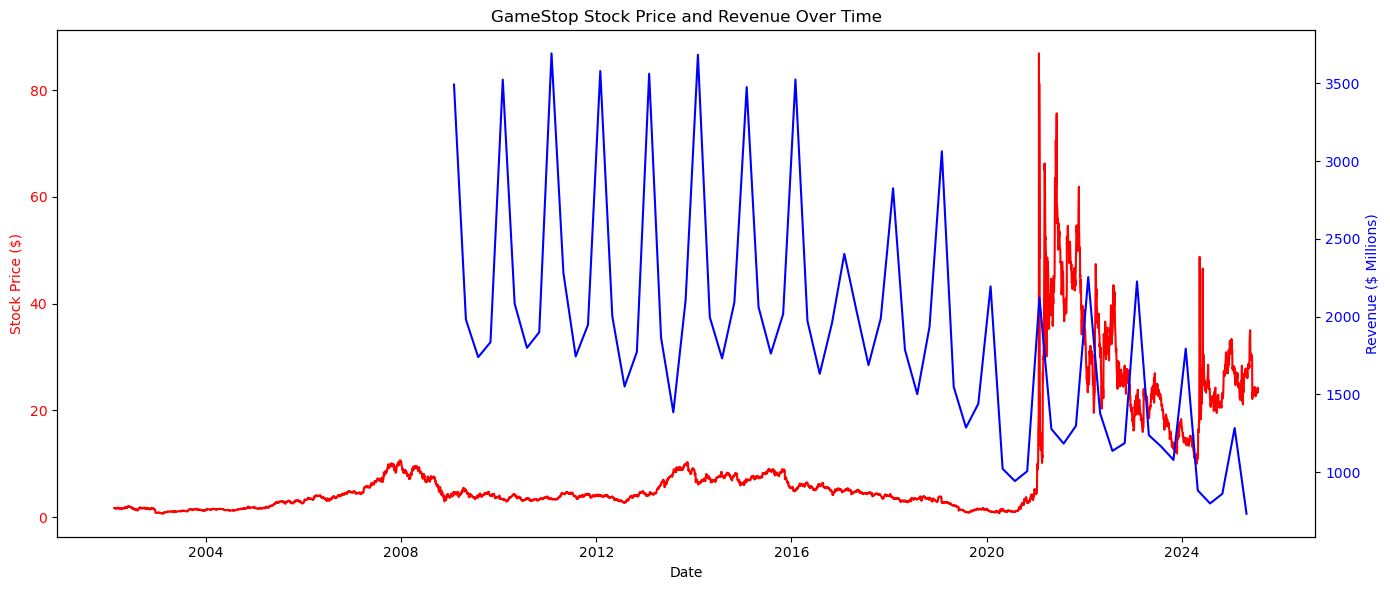

In [9]:
#GameStop Stock and Revenue Dashboard
make_dashboard(gme_data, gme_revenue, 'GameStop')
